Simulations were made with: 150 FF motoneurons, 75 FR motoneurons, 75 S motoneurons and 300 Renshaw cells. All motoneurons were stimulated for 3.5 s at the same rate by asynchronous descending command inputs and in successive trials, the mean rates of the descending command signals inputs were 10, 20, 30,. . ., 400 pps (Uchiyama et al. 2003).

In [1]:
import sys
sys.path.insert(0, '..')
# Allows plots to be zoomed in, etc
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import time

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from InterneuronPool import InterneuronPool
from NeuralTract import NeuralTract
from SynapsesFactory import SynapsesFactory

In order to obtain the mean firing rate of a single S-type MN, for example, the number of spikes discharged from 0.5 s to 3.5 s was divided by 3 s. The ensemble average of the rates of all S-type MNs (including the zero rates of nonactive MNs) was then calculated as the mean of the individual rates (Uchiyama et al. 2003).

In [2]:
def simulation(numberS, numberFR, numberFF, numberRC, numberCM, duration, driveFunction, newParametrization):
    conf = Configuration('confuchiyama.rmto')

    # Number of cells
    idx = np.where(conf.confArray['f0']=='MUnumber_SOL-S')[0][0]
    conf.confArray['f1'][idx] = numberS
    idx = np.where(conf.confArray['f0']=='MUnumber_SOL-FR')[0][0]
    conf.confArray['f1'][idx] = numberFR
    idx = np.where(conf.confArray['f0']=='MUnumber_SOL-FF')[0][0]
    conf.confArray['f1'][idx] = numberFF
    idx = np.where(conf.confArray['f0']=='Number_RC_ext')[0][0]
    conf.confArray['f1'][idx] = numberRC
    idx = np.where(conf.confArray['f0']=='Number_CMExt')[0][0]
    conf.confArray['f1'][idx] = numberCM

    # Duration of simulation
    conf.simDuration_ms = duration
    
    # Generate firing rate with ISI varying according to a gaussian ditribution
    idx = np.where(conf.confArray['f0']=='GammaOrder_CMExt')[0][0]
    conf.confArray['f1'][idx] = 10
    idx = np.where(conf.confArray['f0']=='DriveTarget_CMExt')[0][0]
    conf.confArray['f1'][idx] = 'FR'
    idx = np.where(conf.confArray['f0']=='DriveFunction_CMExt')[0][0]
    conf.confArray['f1'][idx] = driveFunction

    if not newParametrization:
        # Parameters from java
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-S@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FR@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FF@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-S@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FR@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.3
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FF@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.24
        idx = np.where(conf.confArray['f0']=='gmax:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.17
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.3

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 65
        conf.confArray['f2'][idx] = 65
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 285
        conf.confArray['f2'][idx] = 285
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 200
        conf.confArray['f2'][idx] = 200
    else:
        # Parameters from Python
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-S@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FR@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FF@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-S@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FR@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FF@soma|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:SOL-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:SOL-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 25
        conf.confArray['f2'][idx] = 25
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 242
        conf.confArray['f2'][idx] = 242
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 760
        conf.confArray['f2'][idx] = 760
    
    pools = dict()
    pools[0] = MotorUnitPool(conf, 'SOL')
    pools[1] = InterneuronPool(conf, 'RC', 'ext')
    pools[2] = NeuralTract(conf, 'CMExt')

    Syn = SynapsesFactory(conf, pools)

    t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

    for i in xrange(0, len(t)):
        pools[2].atualizePool(t[i]) # Neural tract
        pools[0].atualizeMotorUnitPool(t[i]) # MN pool
        pools[3].atualizePool(t[i]) # RC synaptic Noise
        pools[1].atualizeInterneuronPool(t[i]) # RC pool

    pools[0].listSpikes()
    pools[1].listSpikes()
    pools[2].listSpikes()
    
    # Spikes recorded in a steady state interval, herein considered to be >500 ms
    tmin = 500
    firingRates = []
    for i in xrange(pools[0].MUnumber):
        MUactivity = pools[0].poolTerminalSpikes[pools[0].poolTerminalSpikes[:,1]==i, 0]
        numberOfSpikes = len(MUactivity[MUactivity>tmin])
        firingRates.append(float(numberOfSpikes)*1e3/(conf.simDuration_ms-tmin)) # force division to floating point

    # For avarage of the population
    firingRatesByPopulation = []
    firingRatesByPopulation.append(sum(firingRates[:numberS])/numberS)
    firingRatesByPopulation.append(sum(firingRates[numberS:numberS+numberFR])/numberFR)
    firingRatesByPopulation.append(sum(firingRates[numberS+numberFR:])/numberFF)
    
    return firingRatesByPopulation

In [3]:
nS = 800
nFR = 50
nFF = 50
nRC = 350
nCM = 400
t = 1000 # 3500 takes too long
newParams = False

tic = time.clock()
pps = range(0, 410, 10)
ratesOnTrial = []
for i in pps:
    ratesOnTrial.append(simulation(nS, nFR, nFF, nRC, nCM, t, str(i)+'+0*t', newParams))
toc = time.clock()
print str(toc - tic) + ' seconds'

Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Interneuron Pool of RC ext built
Descending Command CMExt built
All the 737979 synapses were built
Synaptic Noise on RC_ext built
All the 350 synaptic noises were built
Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Interneuron Pool of RC ext built
Descending Command CMExt built
All the 738238 synapses were built
Synaptic Noise on RC_ext built
All the 350 synaptic noises were built
Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Interneuron Pool of RC ext built
Descending Command CMExt built
All the 738065 synapses were built
Synaptic Noise on RC_ext built
All the 350 synaptic noises were built
Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Interneuron Pool of RC ext built
Descending Command CMExt built
All the 737865 synapses were built
Synaptic Noise on RC_ext built
All the 350 synaptic noises were built
Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Inte

Interneuron Pool of RC ext built
Descending Command CMExt built
All the 737907 synapses were built
Synaptic Noise on RC_ext built
All the 350 synaptic noises were built
Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Interneuron Pool of RC ext built
Descending Command CMExt built
All the 737861 synapses were built
Synaptic Noise on RC_ext built
All the 350 synaptic noises were built
Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Interneuron Pool of RC ext built
Descending Command CMExt built
All the 737951 synapses were built
Synaptic Noise on RC_ext built
All the 350 synaptic noises were built
Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Interneuron Pool of RC ext built
Descending Command CMExt built
All the 738260 synapses were built
Synaptic Noise on RC_ext built
All the 350 synaptic noises were built
Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Interneuron Pool of RC ext built
Descending Command CMExt built
All 

<IPython.core.display.Javascript object>


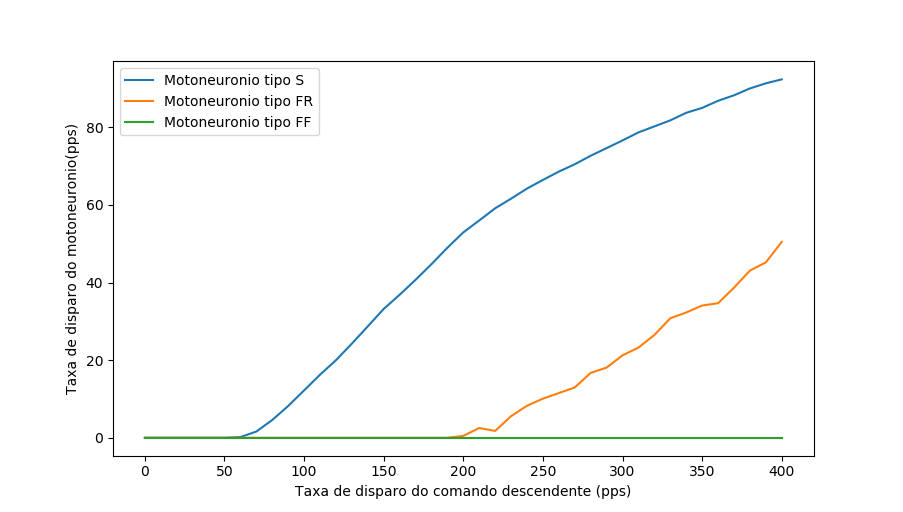

In [14]:
S = [item[0] for item in ratesOnTrial]
FR = [item[1] for item in ratesOnTrial]
FF = [item[2] for item in ratesOnTrial]

plt.figure()
plt.plot(pps, S, '-', label = "Motoneuronio tipo S")
plt.plot(pps, FR, '-', label = "Motoneuronio tipo FR")
plt.plot(pps, FF, '-', label = "Motoneuronio tipo FF")
plt.legend()
plt.xlabel('Taxa de disparo do comando descendente (pps)')
plt.ylabel('Taxa de disparo do motoneuronio(pps)')
plt.show()

In [ ]:
tic = time.clock()
ratesOnTrial2 = []
for i in pps:
    ratesOnTrial2.append(simulation_new(str(i)+'+0*t'))
toc = time.clock()
print str(toc - tic) + ' seconds'

In [ ]:
S = [item[0] for item in ratesOnTrial2]
FR = [item[1] for item in ratesOnTrial2]
FF1 = [item[2] for item in ratesOnTrial2]
FF2 = [item[3] for item in ratesOnTrial2]

plt.figure()
plt.plot(pps, S, 'r')
plt.plot(pps, FR, 'g')
plt.plot(pps, FF1, 'b')
plt.plot(pps, FF2, 'k')
plt.show()

In [18]:
# For avarage of the population
avgRate = [float(sum(col))/len(col) for col in zip(*ratesOnTrial)]
print avgRate
avgRate = [float(sum(col))/len(col) for col in zip(*avgRate)]

[0.11, 0.1, 0.11, 0.12, 0.1, 0.1, 0.09, 0.1, 0.09, 0.09, 0.09, 0.09, 0.08, 0.08, 0.07, 0.08, 0.09, 0.0]


TypeError: zip argument #1 must support iteration

As discussed in Duchateau and Baudry (2014), maximal discharge rate during slow isometric ramp contractions usually reaches values of 20–50 Hz whereas it can attain much higher values (>100 Hz), albeit briefly, during fast contractions (for reviews, see Enoka and Fuglevand, 2001; Duchateau and Enoka, 2011). Therefore, pps values used above are not realistic, but are used to evaluate MNs behavior.